# Оптимизация гиперпараметров
## Цель работы
Познакомиться с оптимизацией гиперпараметров

## Содержание работы
1. Сгенерировать датасет для задачи бинарной классификации с использованием функции make_classification.
2. Построить и оценить качество различных моделей классификации, используя метрики accuracy и F1-score.
3. Построить модель elasticnet на данных прогнозирования продаж.
4. Оптимизировать гиперпараметры данной модели с помощью поиска по сетке

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Сгенерировать датасет для задачи бинарной классификации с использованием функции make_classification.

In [22]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [23]:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)

In [24]:
X.shape, y.shape

((1000, 5), (1000,))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [26]:
X_train.shape, y_train.shape

((800, 5), (800,))

In [27]:
X_test.shape, y_test.shape

((200, 5), (200,))

### 2. Построить и оценить качество различных моделей классификации, используя метрики accuracy и F1-score.

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score

In [29]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [30]:
accuracy = []
f1 = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test, clf.predict(X_test)))
    f1.append(f1_score(y_test, clf.predict(X_test), average="macro"))

c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [31]:
df = pd.DataFrame()
df['model'] = names
df['accuracy_score'] = accuracy
df['f1_score'] = f1
df.sort_values(by=["accuracy_score", "f1_score"], ascending=False, inplace=True)
df

,model,accuracy_score,f1_score
9,Neural_Net,0.870,0.869674
11,Naive_Bayes,0.865,0.864834
4,Gaussian_Process,0.860,0.859649
8,Random_Forest,0.860,0.859649
7,Extra_Trees,0.860,0.859098
6,Decision_Tree,0.860,0.858857
5,Gradient_Boosting,0.855,0.854706
1,Linear_SVM,0.850,0.849940
12,QDA,0.845,0.844965
0,Nearest_Neighbors,0.845,0.844685


In [32]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,model,accuracy_score,f1_score
9,Neural_Net,0.870000,0.869674
11,Naive_Bayes,0.865000,0.864834
4,Gaussian_Process,0.860000,0.859649
8,Random_Forest,0.860000,0.859649
7,Extra_Trees,0.860000,0.859098
6,Decision_Tree,0.860000,0.858857
5,Gradient_Boosting,0.855000,0.854706
1,Linear_SVM,0.850000,0.849940
12,QDA,0.845000,0.844965
0,Nearest_Neighbors,0.845000,0.844685


<Axes: xlabel='accuracy_score', ylabel='model'>

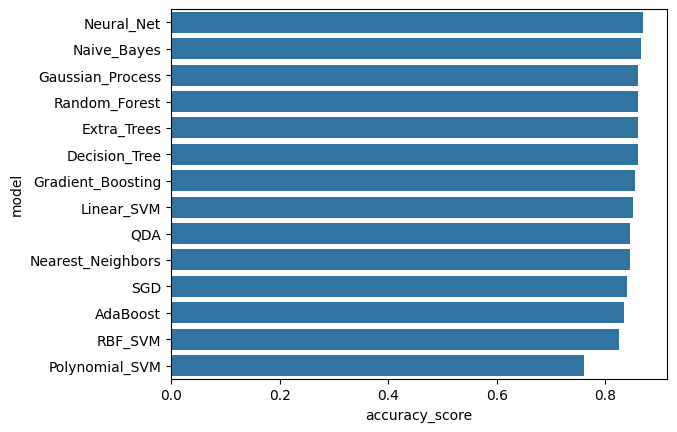

In [33]:
ax = sns.barplot(y="model", x="accuracy_score", data=df)
ax

<Axes: xlabel='f1_score', ylabel='model'>

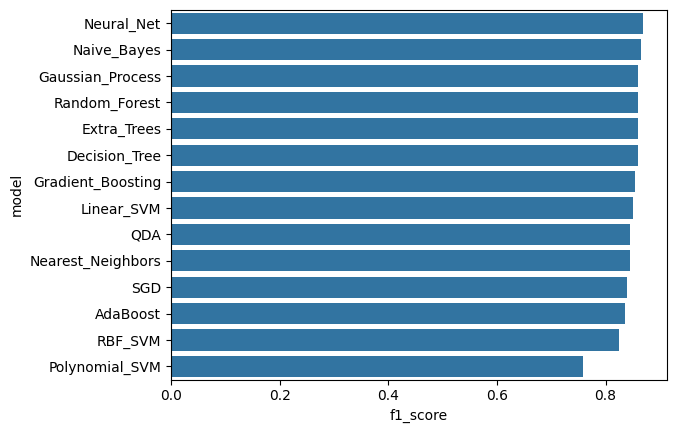

In [34]:
ax = sns.barplot(y="model", x="f1_score", data=df)
ax

### 3. Построить модель elasticnet на данных прогнозирования продаж.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [37]:
df = pd.read_csv("data/Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [38]:
X = df.drop('sales',axis=1)
y = df['sales']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
help(ElasticNet)

Help on class ElasticNet in module sklearn.linear_model._coordinate_descent:

class ElasticNet(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |
 |  Minimizes the objective function::
 |
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |
 |          a * ||w||_1 + 0.5 * b * ||w||_2^2
 |
 |  where::
 |
 |          alpha = a + b and l1_ratio = a / (a + b)
 |
 |  The parameter l1_ratio corresponds to alpha in the glmnet R package while
 |  alpha corresponds to

- функция оценки - estimator (рregressor или classifier, например sklearn.svm.SVC());
- пространство параметров;
- метод поиска или сэмплирования кандидатов;
- схема кросс-валидации
- функция оценки (score function).

In [43]:
base_elastic_model = ElasticNet()

In [46]:
base_elastic_model.fit(X_train, y_train)

ElasticNet()

In [47]:
base_elastic_model.coef_

array([2.23115006, 1.57566177, 0.03199462])

In [49]:
y_pred = base_elastic_model.predict(X_test)

In [65]:
mse = mean_squared_error(y_test, y_pred)
mse

7.5362450466576165

In [66]:
y_mean = y_test.mean()
y_mean

13.348333333333333

In [67]:
norm_mse = mse / y_mean
norm_mse

0.5645832223741504

Модель ошибается, но не критично

### 4. Оптимизировать гиперпараметры данной модели с помощью поиска по сетке

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]} # Возможные значения гиперпараметров

In [71]:
# число verbose выбирайте сами - вывод уровней информации
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2) 

In [72]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [73]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [74]:
best_elastic_model = grid_model.best_estimator_

In [75]:
y_pred = best_elastic_model.predict(X_test)

In [76]:
mean_squared_error(y_test,y_pred)

2.387342642087474